In [74]:
import nt2                        # Toolkit for particle simulation data
import numpy as np                # Numerical operations
import matplotlib.pyplot as plt   # Plotting library              

In [54]:
import importlib.metadata as md

print("numpy:", np.__version__)
print("nt2py:", md.version("nt2py"))

numpy: 1.26.4
nt2py: 1.3.0


In [55]:
np.concat = np.concatenate       # hotfix for nt2 read_column() error

## $u_{Stream} = \pm\ 0.1$

In [129]:
data = nt2.Data("/dartfs/rc/lab/E/EPaCO/phys118/godfrey/hw2/twostream")

### Two-Stream Instability (PIC Method)

In [130]:
pdata = data.particles

In [134]:
ind_out = np.arange(0, 500, 1)

for i in ind_out:

    # Read particle columns from the dataset at a specific step
    # 'read_column' extracts the data as a NumPy array for easier plotting
    # Step = 1 + ind_out*492 is how we select a specific snapshot in time
    # Columns:
    # 'x'  -> particle position along x-axis
    # 'ux' -> particle momentum along x-axis
    # 'sp' -> particle species

    pdata_x = pdata.read_column(colname='x', step=1 + i*492)
    pdata_ux = pdata.read_column(colname='ux', step=1 + i*492)
    pdata_sp = pdata.read_column(colname='sp', step=1 + i*492)

    pdata_x_s1 = pdata_x[pdata_sp == 1]
    pdata_x_s3 = pdata_x[pdata_sp == 3]
    pdata_ux_s1 = pdata_ux[pdata_sp == 1]
    pdata_ux_s3 = pdata_ux[pdata_sp == 3]
        
    ' Create a scatter plot of particle positions vs. momenta '
        
    plt.figure(figsize=(7, 4))

    # Species 1
    plt.scatter(
        pdata_x_s1, pdata_ux_s1,
        s=8,                # Marker size
        alpha=0.6,          # Transparency
        label=r'Species 1', # Legend label
        color='red'         # Color for species 1
    )

    # Species 3
    plt.scatter(
        pdata_x_s3, pdata_ux_s3,
        s=8,
        alpha=0.6,
        label=r'Species 3',
        color='blue'
    )

    plt.xlim(0, 100)
    plt.ylim(-2.25, 2.25)
    plt.xlabel(r'$x\ (c/\omega_{pe})$', fontsize=12)
    plt.ylabel(r'$p_x\ (\gamma v_x / c)$', fontsize=12)
    plt.title('Two-Stream Instability Phase Space:   $u_{Stream}= \pm\ 0.1$', fontsize=12)
    plt.legend(loc='upper right', frameon=False, fontsize=10)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.5)
    plt.tight_layout()
    #plt.show()
    plt.savefig('two_stream_1/position_vs_momentum{}.png'.format(i))
    plt.close()

print('All quantities are shown in standard PIC normalized units.')
print('')

All quantities are shown in standard PIC normalized units.



### Time Evolution of Total Electric Field Energy

In [135]:
fdata = data.fields

In [137]:
ind_out = np.arange(0, 500, 1)

for i in ind_out:

    ex_array = np.array(fdata.isel(t = i).Ex.load())
    ez_array = np.array(fdata.isel(t = i).Ez.load())
    x_array = np.array(fdata.isel(t = i).x.load())

    ' Create a scatter plot of positions vs. field data '

    plt.figure(figsize=(7, 4))

    plt.plot(x_array, ex_array, label = r'$E_x$')
    plt.plot(x_array, ez_array, label = r'$E_z$')

    plt.xlim(0, 100)
    #plt.ylim(-0.1, 0.1)
    plt.xlabel(r'$x\ (c/\omega_{pe})$', fontsize=12)
    plt.ylabel(r'$E-Field\ (m_e c \omega_{pe}/e)$', fontsize=12)
    plt.title('Time Evolution of Total Electric Field Energy:   $u_{Stream}= \pm\ 0.1$', fontsize=12)
    plt.legend(loc='upper right', frameon=False, fontsize=10)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.5)
    plt.tight_layout()
    #plt.show()
    plt.savefig('E-field_energy_1/energy_over_time{}.png'.format(i))
    plt.close()

print('All quantities are shown in standard PIC normalized units.')
print('')

All quantities are shown in standard PIC normalized units.



## $u_{Stream} = \pm\ 1$

In [138]:
data = nt2.Data("/dartfs/rc/lab/E/EPaCO/phys118/godfrey/hw2/twostream2")

### Two-Stream Instability (PIC Method)

In [139]:
pdata = data.particles

In [141]:
ind_out = np.arange(0, 500, 1)

for i in ind_out:

    # Read particle columns from the dataset at a specific step
    # 'read_column' extracts the data as a NumPy array for easier plotting
    # Step = 1 + ind_out*492 is how we select a specific snapshot in time
    # Columns:
    # 'x'  -> particle position along x-axis
    # 'ux' -> particle momentum along x-axis
    # 'sp' -> particle species

    pdata_x = pdata.read_column(colname='x', step=1 + i*492)
    pdata_ux = pdata.read_column(colname='ux', step=1 + i*492)
    pdata_sp = pdata.read_column(colname='sp', step=1 + i*492)

    pdata_x_s1 = pdata_x[pdata_sp == 1]
    pdata_x_s3 = pdata_x[pdata_sp == 3]
    pdata_ux_s1 = pdata_ux[pdata_sp == 1]
    pdata_ux_s3 = pdata_ux[pdata_sp == 3]
        
    ' Create a scatter plot of particle positions vs. momenta '
        
    plt.figure(figsize=(7, 4))

    # Species 1
    plt.scatter(
        pdata_x_s1, pdata_ux_s1,
        s=8,                # Marker size
        alpha=0.6,          # Transparency
        label=r'Species 1', # Legend label
        color='red'         # Color for species 1
    )

    # Species 3
    plt.scatter(
        pdata_x_s3, pdata_ux_s3,
        s=8,
        alpha=0.6,
        label=r'Species 3',
        color='blue'
    )

    plt.xlim(0, 100)
    plt.ylim(-2.25, 2.25)
    plt.xlabel(r'$x\ (c/\omega_{pe})$', fontsize=12)
    plt.ylabel(r'$p_x\ (\gamma v_x / c)$', fontsize=12)
    plt.title('Two-Stream Instability Phase Space:   $u_{Stream}= \pm\ 1.0$', fontsize=12)
    plt.legend(loc='upper right', frameon=False, fontsize=10)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.5)
    plt.tight_layout()
    #plt.show()
    plt.savefig('two_stream_2/position_vs_momentum{}.png'.format(i))
    plt.close()

print('All quantities are shown in standard PIC normalized units.')
print('')

All quantities are shown in standard PIC normalized units.



### Time Evolution of Total Electric Field Energy

In [142]:
fdata = data.fields

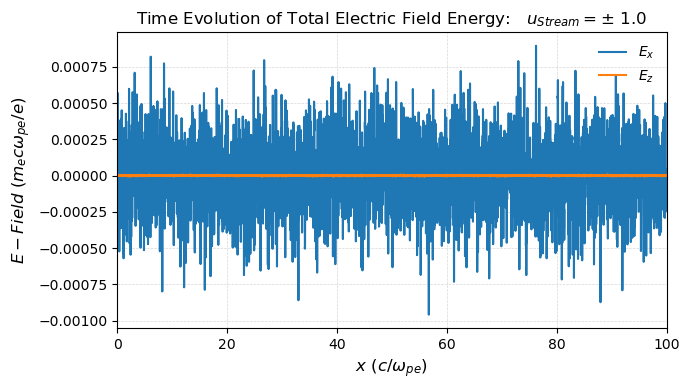

All quantities are shown in standard PIC normalized units.



In [143]:
ind_out = np.arange(0, 500, 1)

for i in ind_out:

    ex_array = np.array(fdata.isel(t = i).Ex.load())
    ez_array = np.array(fdata.isel(t = i).Ez.load())
    x_array = np.array(fdata.isel(t = i).x.load())

    ' Create a scatter plot of positions vs. field data '

    plt.figure(figsize=(7, 4))

    plt.plot(x_array, ex_array, label = r'$E_x$')
    plt.plot(x_array, ez_array, label = r'$E_z$')

    plt.xlim(0, 100)
    #plt.ylim(-1.75, 1.75)
    plt.xlabel(r'$x\ (c/\omega_{pe})$', fontsize=12)
    plt.ylabel(r'$E-Field\ (m_e c \omega_{pe}/e)$', fontsize=12)
    plt.title('Time Evolution of Total Electric Field Energy:   $u_{Stream}= \pm\ 1.0$', fontsize=12)
    plt.legend(loc='upper right', frameon=False, fontsize=10)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.5)
    plt.tight_layout()
    plt.show()
    #plt.savefig('E-field_energy_2/energy_over_time{}.png'.format(i))
    #plt.close()

print('All quantities are shown in standard PIC normalized units.')
print('')